# Chapter 1

Data: https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo

In [123]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [124]:
medal_count = pd.read_excel("Data/2021 Olympics in Tokyo/Medals.xlsx")
medal_count

/Users/zigapetelin/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


### Estimates of Location

In [125]:
#Mean
medal_count["Total"].mean()
print("On average, a country got", medal_count["Total"].mean(), "medals")

On average, a country got 11.612903225806452 medals


In [126]:
# Trimmed mean and Median
print(stats.trim_mean(medal_count["Total"], 0.1))
print(medal_count["Total"].median())

6.8933333333333335
4.0


We can see the trimmed mean, which trims the tails (extremes) of the distributions, is closer to the median compared to the mean. This might indicate fat tails.

In [127]:
np.average(medal_count["Total"], weights=medal_count["Gold"])

46.832352941176474

Weighing medal count by the number of gold medals moves the average to 46.8. This means that those that got more medals in total, also got more gold medals.

In [128]:
print(medal_count["Gold"].mean())
print(stats.trim_mean(medal_count["Gold"], 0.1))

3.6559139784946235
1.96


Trimming 10% from each side of gold medals tells us that on average each country got 1.96 gold medals. The difference from the normal average tells us that we again, probably have fat tails (a few countries with a lot of gold medals).

In [129]:
#Weighted median def from the book
def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count, "Total", "Gold")

40

In [130]:
q3 = np.quantile(medal_count["Total"], 0.75)
#75% have less than 11 medals and 25% more than 11.

In [131]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


### Estimates of Variability

In [132]:
#Variance
from statistics import variance
variance(medal_count["Gold"])

49.315100514259

In [133]:
#Standard deviation
from statistics import stdev
stdev(medal_count["Gold"])

7.022471111671375

In [134]:
#Mean abosulte deviation
np.mean(np.absolute(medal_count["Gold"] - np.mean(medal_count["Gold"])))

4.0048560527228565

In [135]:
#Median absolute deviation
np.median(np.absolute(medal_count["Gold"] - np.median(medal_count["Gold"])))

1.0

In [136]:
#Interquantile range
q3, q1 = np.percentile(medal_count["Gold"], [75, 25])
iqr = q3 - q1
iqr

3.0

### Exploring the Data Distribution

In [137]:
#Box Plots
medal_count.boxplot(column="Gold", by=None, ax=None)

<Axes: >

We can see that we have a few outliers with a lot of gold medals compared to other countries. Here it would be interesting to see what affects the number of medals won by a country: is it the size of the population, economic wealth...

In [138]:
#Frequency Table
frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count["Gold"], 10)
frequency_table.groupby("freq", observed=False)["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


We see that the majority of countries received between -0.039 (excluding) and 3.9 (including) gold medals

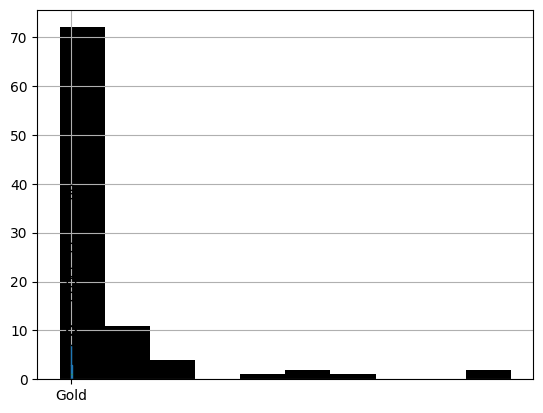

In [139]:
#Histogram
plt.hist(x=medal_count["Gold"], bins=10, color="black")
plt.show()

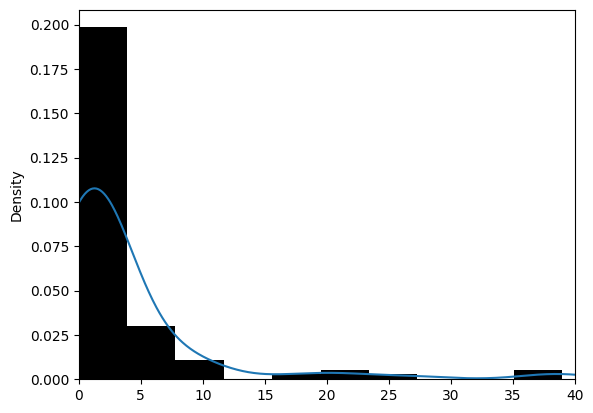

In [140]:
#Density plot
ax = medal_count["Gold"].plot.hist(density=True, xlim=[0, 40], bins=10, color="black")
medal_count["Gold"].plot.density(ax=ax)
ax.set_label("Number of gold medals")
plt.show()

### Exploring Binary and Categorical Data

In [141]:
#Mode
medal_count["Gold"].mode()

0    0
Name: Gold, dtype: int64

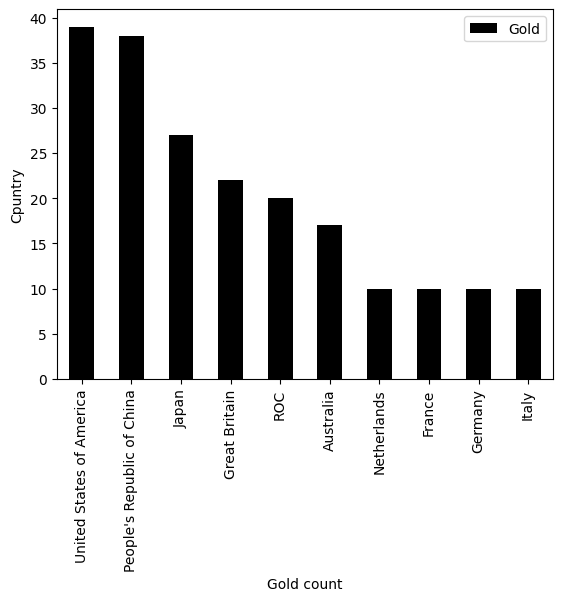

In [142]:
#Bar chart - number of golds for the 10 countries with the most golds
ax = medal_count.iloc[:10].plot.bar(x = "Team/NOC", y = "Gold", color="black")
ax.set_xlabel("Gold count")
ax.set_ylabel("Cpuntry")
plt.show()

### Exploring Multiple Variables

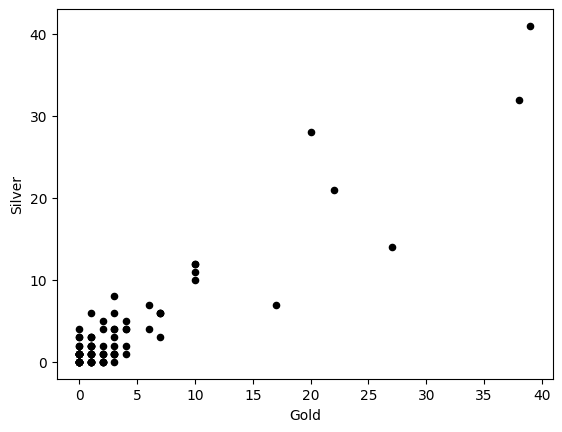

In [143]:
#Correlation
medal_count.plot.scatter(x="Gold", y="Silver", color="black")
plt.show()

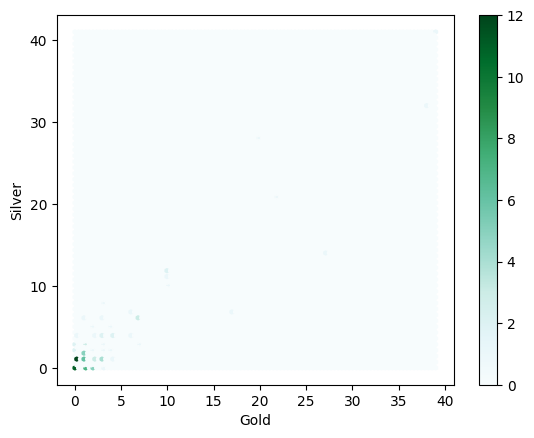

In [144]:
medal_count.plot.hexbin(x="Gold", y="Silver", sharex=False)
plt.show()
#Due to us not having a lot of data, this isn't very useful

/Users/zigapetelin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zigapetelin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


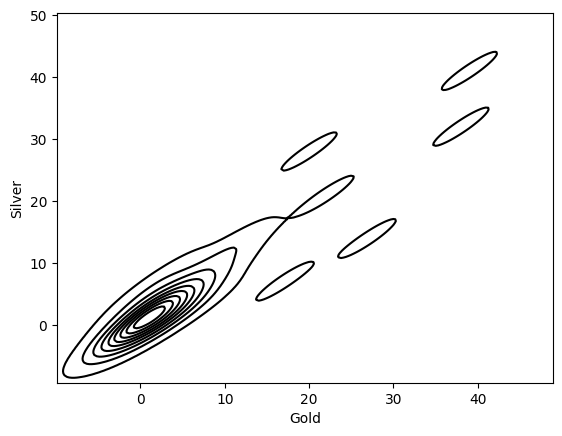

In [145]:
#Contour plot
import seaborn as sns
ax = sns.kdeplot(x=medal_count["Gold"], y=medal_count["Silver"], color="black")
plt.show()

In [146]:
#Contingency Table
contingency = medal_count[["Silver", "Gold"]].pivot_table(index="Silver", columns="Gold", aggfunc=lambda x: len(x), margins=True)
contingency.fillna(0)


Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


This shows us how many countries got x gold and y silver medals.

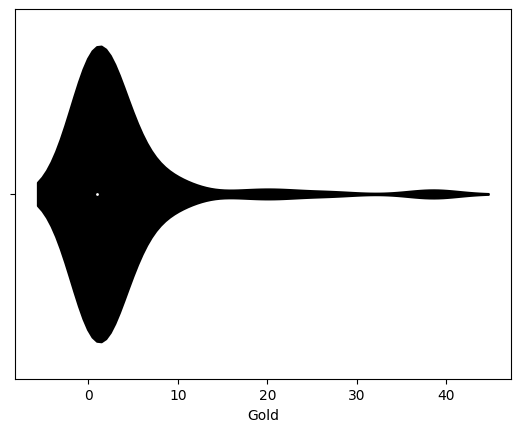

In [147]:
#Violin plot
sns.violinplot(x=medal_count["Gold"], color="black")
plt.show()